# Stock Market Prediction and Forecasting using ML

### Keras and TensorFlow

In [75]:
### Data collection and processing (AAPL)
from pandas_datareader import data as pdr
import yfinance as yf
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import tensorflow as tf
from numpy import array
import math
from sklearn.metrics import mean_squared_error

In [76]:
# Download data
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)
stock = "AAPL"
data = yf.download(stock, start=start, end=end)
df = data

# Save to CSV
df.to_csv("AAPL.csv")

/tmp/ipykernel_202531/813177498.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, start=start, end=end)
[*********************100%***********************]  1 of 1 completed


In [77]:
# Read the CSV file properly
df = pd.read_csv("AAPL.csv", skiprows=3)
print("Original DataFrame:")
print(df.head())
print("\nColumns:", df.columns.tolist())

# The first column contains dates, rename it properly
df.columns = ["Date", "Close", "High", "Low", "Open", "Volume"]

print("\nAfter renaming columns:")
print(df.head())
print("\nColumns:", df.columns.tolist())

Original DataFrame:
   2024-06-24  207.17112731933594  211.70989851928564  205.6283393856244  \
0  2024-06-25          208.096802          210.396046         207.638936   
1  2024-06-26          212.257339          213.859846         209.659488   
2  2024-06-27          213.103409          214.735774         211.361555   
3  2024-06-28          209.639572          215.064215         209.321070   
4  2024-07-01          215.741043          216.497500         210.933525   

   206.75308420226276  80727000  
0          208.176416  56713900  
1          210.515486  66213200  
2          213.690659  49772700  
3          214.765608  82542700  
4          211.102731  60402900  

Columns: ['2024-06-24', '207.17112731933594', '211.70989851928564', '205.6283393856244', '206.75308420226276', '80727000']

After renaming columns:
         Date       Close        High         Low        Open    Volume
0  2024-06-25  208.096802  210.396046  207.638936  208.176416  56713900
1  2024-06-26  212.257339 

In [78]:
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

# Ensure numeric columns are properly typed
numeric_columns = ["Open", "High", "Low", "Close", "Adj Close", "Volume"]
for col in numeric_columns:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

In [79]:
print("\nCleaned DataFrame:")
print(df.head())
print("\nData types after cleaning:")
print(df.dtypes)


Cleaned DataFrame:
                 Close        High         Low        Open    Volume
Date                                                                
2024-06-25  208.096802  210.396046  207.638936  208.176416  56713900
2024-06-26  212.257339  213.859846  209.659488  210.515486  66213200
2024-06-27  213.103409  214.735774  211.361555  213.690659  49772700
2024-06-28  209.639572  215.064215  209.321070  214.765608  82542700
2024-07-01  215.741043  216.497500  210.933525  211.102731  60402900

Data types after cleaning:
Close     float64
High      float64
Low       float64
Open      float64
Volume      int64
dtype: object


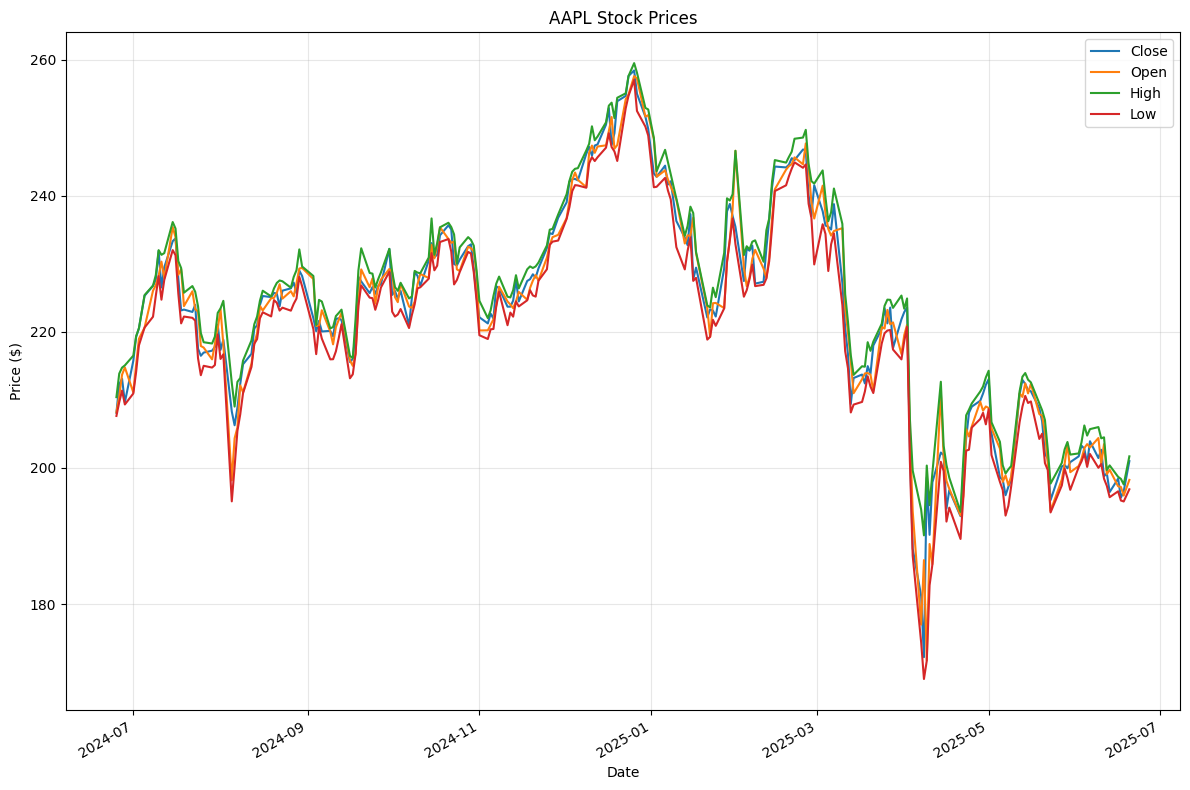

In [80]:
# Plot the stock prices
df[["Close", "Open", "High", "Low"]].plot(figsize=(12, 8))
plt.title("AAPL Stock Prices")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [81]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df).reshape(-1,1))

In [82]:
df1.shape

(1240, 1)

In [83]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]

In [84]:
training_size, test_size

(806, 434)

In [85]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX),np.array(dataY)

In [86]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [87]:
print(X_train.shape), print(y_train.shape)
print(X_test.shape), print(ytest.shape)

(705, 100)
(705,)
(333, 100)
(333,)


(None, None)

In [88]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [89]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")

/home/bipasha/Desktop/git/.venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [90]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [91]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [92]:
model.fit(
    X_train,
    y_train,
    validation_data=(X_test, ytest),
    epochs=100,
    batch_size=64,
    verbose=1,
)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 142ms/step - loss: 0.0053 - val_loss: 0.0078
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - loss: 0.0080 - val_loss: 0.0074
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - loss: 0.0078 - val_loss: 0.0075
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - loss: 0.0066 - val_loss: 0.0074
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - loss: 0.0055 - val_loss: 0.0074
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - loss: 0.0040 - val_loss: 0.0074
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - loss: 0.0047 - val_loss: 0.0074
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - loss: 0.0065 - val_loss: 0.0074
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - loss: 0.0052 - val_loss: 0.0075
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - loss: 0.0063 - val_loss: 0.0074
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - loss: 0.0051 - val_loss: 0.0074
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/ste

In [93]:
tf.__version__

'2.19.0'

In [94]:
### Lets Do the prediction and check performance metrics
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [95]:
##Transformback to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [96]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_train, train_predict))

21733549.957520813

In [97]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest, test_predict))

23556412.04744022

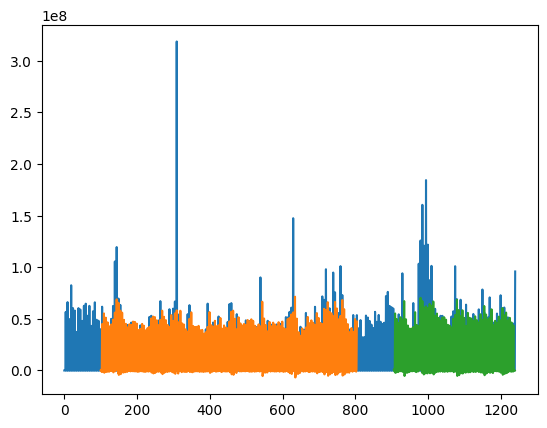

In [98]:
### Plotting
# shift train predictions for plotting
look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back : len(train_predict) + look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2) + 1 : len(df1) - 1, :] = (
    test_predict
)
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [99]:
len(test_data)

434

In [100]:
x_input = test_data[341:].reshape(1, -1)
x_input.shape

(1, 93)

In [101]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [102]:
temp_input

[7.679056245318805e-08,
 7.744950443990158e-08,
 0.24611772691855577,
 9.797170246034632e-08,
 9.963481036374044e-08,
 8.924816667329977e-08,
 9.197821283348347e-08,
 0.17662978072973867,
 9.863064444705984e-08,
 1.0587929358850681e-07,
 9.69988987730873e-08,
 9.916408963482155e-08,
 0.14227303025412766,
 9.715580568272675e-08,
 1.0926828173540415e-07,
 9.263715482019721e-08,
 1.0854656740858153e-07,
 0.16127988701521778,
 9.997998641244091e-08,
 1.0346310912886881e-07,
 8.72085204917837e-08,
 9.533579086969307e-08,
 0.22222853893714897,
 1.0264721235124924e-07,
 1.0399655431663042e-07,
 9.768925087048846e-08,
 9.81913338288287e-08,
 0.11115589591827817,
 1.0757381160258867e-07,
 1.0914278493645223e-07,
 1.003251624611416e-07,
 1.0154895974630447e-07,
 0.14554245688723258,
 1.0616174517836478e-07,
 1.1689351703623976e-07,
 1.0390241974709985e-07,
 1.0644414888695626e-07,
 0.13682649622295365,
 9.928963431503975e-08,
 1.1221795926407035e-07,
 9.778338544001902e-08,
 1.082955259294114e-0

In [103]:
lst_output = []
n_steps = 100
i = 0
while i < 30:

    if len(temp_input) > 100:
        # print(temp_input)
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        # print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        # print(temp_input)
        lst_output.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i + 1


print(lst_output)

ValueError: cannot reshape array of size 93 into shape (1,100,1)

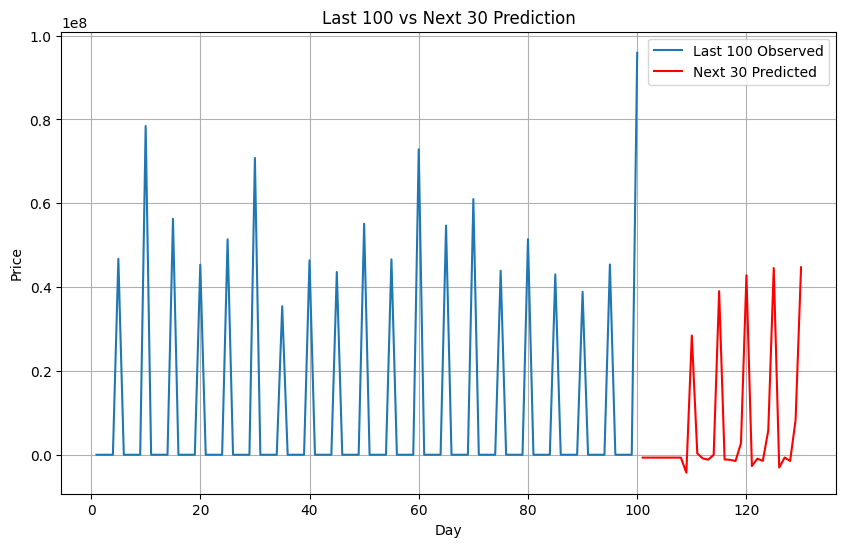

In [ ]:
# Select the last 100 known values from your scaled data
last_100 = df1[-100:]  # shape will be (100, 1)

# Inverse transform
last_100_inv = scaler.inverse_transform(last_100)

# Reshape lst_output and inverse transform
predicted_data = scaler.inverse_transform(np.array(lst_output).reshape(-1, 1))

# Now plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(day_new, last_100_inv, label="Last 100 Observed")
plt.plot(day_pred, predicted_data, label="Next 30 Predicted", color="red")
plt.legend()
plt.xlabel("Day")
plt.ylabel("Price")
plt.title("Last 100 vs Next 30 Prediction")
plt.grid(True)
plt.show()

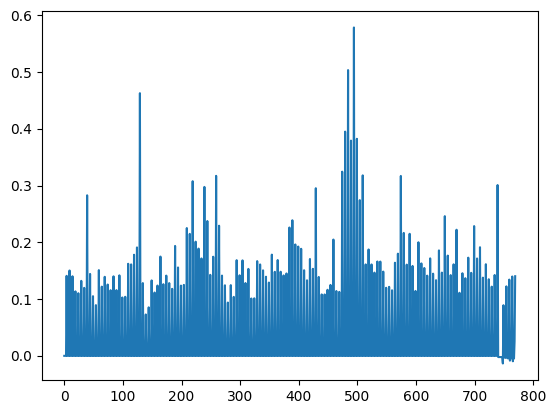

In [ ]:
df3 = df1.tolist()
df3.extend(lst_output)
plt.plot(df3[500:])

In [ ]:
df3 = scaler.inverse_transform(df3).tolist()

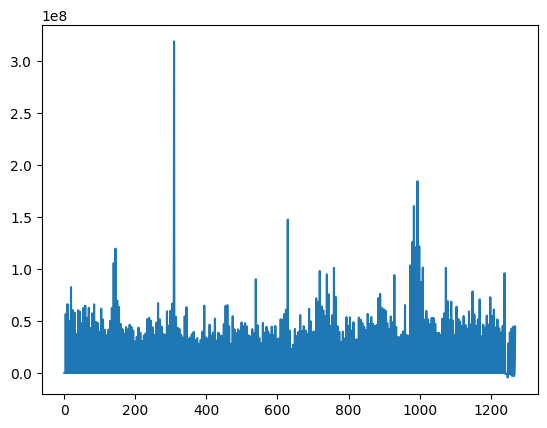

In [ ]:
plt.plot(df3)